In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from env import host, user, password
import acquire
import wrangle
import prepare
import cluster



import warnings
warnings.filterwarnings("ignore")

## Bring in Data from CSV

In [40]:
df = pd.read_csv('zillow_df.csv')

In [41]:
df = df.drop(df.columns[0], axis=1)

In [42]:
df.shape

(59930, 17)

In [32]:
pd.set_option('display.max_columns', None)

## Define X and y variables

In [5]:
X = df[['longitude', 'latitude', 'age', 'month',
        'square_footage', 'lot_size', 'house_value',
        'land_value', 'full_value', 'tax_rate', 'roomcnt',
        'Los_Angeles', 'Orange', 'Ventura', 'bed_bath_ratio', 'bathroomcnt', 'logerror']]
y = df[['logerror']]

## Split and Scale data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 121)

In [7]:
scaler = MinMaxScaler(copy=True, feature_range=(0,1)).fit(X_train)

train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns.values).set_index([X_train.index.values])

test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns.values).set_index([X_test.index.values])

train_scaled.head()

,longitude,latitude,age,month,square_footage,lot_size,house_value,land_value,full_value,tax_rate,roomcnt,Los_Angeles,Orange,Ventura,bed_bath_ratio,bathroomcnt,logerror
21711,0.157109,0.607455,0.031250,0.250,0.056347,0.000971,0.016757,0.003120,0.006246,0.029456,0.4,0.0,0.0,1.0,0.109375,0.088235,0.582191
72428,0.672587,0.529268,0.307292,1.000,0.047217,0.000355,0.010196,0.001509,0.003413,0.015319,0.0,1.0,0.0,0.0,0.101562,0.058824,0.592607
20516,0.713434,0.482563,0.437500,0.250,0.026790,0.001023,0.009455,0.003694,0.005455,0.015570,0.0,1.0,0.0,0.0,0.062500,0.058824,0.578472
42112,0.783232,0.490910,0.166667,0.625,0.032001,0.007152,0.010826,0.000849,0.002873,0.017562,0.0,1.0,0.0,0.0,0.062500,0.058824,0.573050
6853,0.598599,0.310265,0.208333,0.000,0.083829,0.001027,0.010961,0.006271,0.008308,0.015404,0.0,1.0,0.0,0.0,0.088542,0.117647,0.585259


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76659 entries, 0 to 76658
Data columns (total 18 columns):
longitude         76659 non-null float64
latitude          76659 non-null float64
age               76659 non-null float64
month             76659 non-null int64
bedroomcnt        76659 non-null float64
bathroomcnt       76659 non-null float64
square_footage    76659 non-null float64
lot_size          76659 non-null float64
house_value       76659 non-null float64
land_value        76659 non-null float64
full_value        76659 non-null float64
tax_rate          76659 non-null float64
roomcnt           76659 non-null float64
Los_Angeles       76659 non-null int64
Orange            76659 non-null int64
Ventura           76659 non-null int64
logerror          76659 non-null float64
bed_bath_ratio    76659 non-null float64
dtypes: float64(14), int64(4)
memory usage: 10.5 MB


## Two Feature/Value

In [9]:
cluster_vars = train_scaled[['bed_bath_ratio','square_footage', 'tax_rate']]
cluster_col_name = 'two_feature_value'
centroid_col_names = ['centroid_' + i for i in cluster_vars]

     k         sse
0    2  136.655647
1    3   83.451546
2    4   65.313765
3    5   48.754780
4    6   39.836473
5    7   33.594975
6    8   29.507572
7    9   26.342610
8   10   23.496172
9   11   21.712268
10  12   19.938939
11  13   18.408610
12  14   17.030001
13  15   15.914582
14  16   14.882503
15  17   13.946996
16  18   13.113816
17  19   12.227741


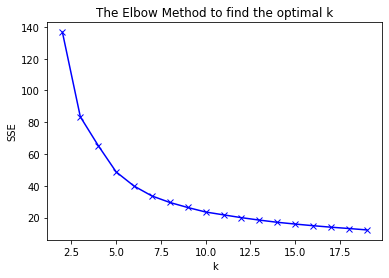

In [10]:
optimal_k = cluster.elbow_method(cluster_vars)

In [11]:
kmeans, train_clusters, test_clusters, cluster_counts = cluster.get_clusters_and_counts(5, ['bed_bath_ratio', 'square_footage', 'tax_rate'], 
                                                                                        'two_feature_value', train_scaled, test_scaled)

In [12]:
X_train, train_scaled, X_test, test_scaled, centroids = cluster.append_clusters_and_centroids(
                                X_train, train_scaled, train_clusters, 
                                X_test, test_scaled, test_clusters, 
                                cluster_col_name, centroid_col_names, kmeans)

In [13]:
X_train

,longitude,latitude,age,month,square_footage,lot_size,house_value,land_value,full_value,tax_rate,...,Los_Angeles,Orange,Ventura,bed_bath_ratio,bathroomcnt,logerror,two_feature_value,centroid_bed_bath_ratio,centroid_square_footage,centroid_tax_rate
21711,-119173645.0,34238098.0,7.0,3,1464.0,7201.0,153720.0,153720.0,307440.0,0.024141,...,0,0,1,1.600000,2.5,0.031199,2,0.119646,0.053951,0.016592
72428,-118183524.0,34122442.0,60.0,9,1266.0,2911.0,93588.0,74869.0,168457.0,0.012600,...,1,0,0,1.500000,2.0,0.115045,2,0.119646,0.053951,0.016592
20516,-118105067.0,34053353.0,85.0,3,823.0,7564.0,86795.0,181819.0,268614.0,0.012805,...,1,0,0,1.000000,2.0,0.001261,1,0.061464,0.049972,0.015433
42112,-117971000.0,34065700.0,33.0,6,936.0,50291.0,99368.0,42578.0,141946.0,0.014431,...,1,0,0,1.000000,2.0,-0.042390,1,0.061464,0.049972,0.015433
6853,-118325639.0,33798484.0,41.0,1,2060.0,7592.0,100601.0,307982.0,408583.0,0.012669,...,1,0,0,1.333333,3.0,0.055890,0,0.085495,0.109827,0.015615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30754,-118071760.0,34586675.0,61.0,4,1056.0,7257.0,132794.0,33198.0,165992.0,0.016483,...,1,0,0,1.500000,2.0,-0.012334,2,0.119646,0.053951,0.016592
36351,-118337522.0,33783671.0,58.0,5,2220.0,23328.0,369551.0,1478204.0,1847755.0,0.011057,...,1,0,0,1.500000,2.0,0.102556,0,0.085495,0.109827,0.015615
51265,-117996812.0,33723862.0,55.0,6,1390.0,6001.0,86586.0,181689.0,268275.0,0.011759,...,0,1,0,2.000000,2.0,0.001526,2,0.119646,0.053951,0.016592
56584,-118281892.0,34522021.0,52.0,7,3123.0,225070.0,156736.0,13849.0,170585.0,0.012540,...,1,0,0,1.666667,3.0,0.071266,0,0.085495,0.109827,0.015615


## Feature/Age/Value

In [14]:
cluster_vars = train_scaled[['lot_size', 'age', 'full_value']]
cluster_col_name = 'feature_age_value'
centroid_col_names = ['centroid_' + i for i in cluster_vars]

     k         sse
0    2  293.148889
1    3  161.877891
2    4   94.565975
3    5   68.938498
4    6   56.225534
5    7   48.559971
6    8   43.307189
7    9   37.318082
8   10   33.528252
9   11   30.256727
10  12   27.027309
11  13   24.383592
12  14   22.323640
13  15   21.129382
14  16   20.091785
15  17   18.975546
16  18   18.355288
17  19   17.181046


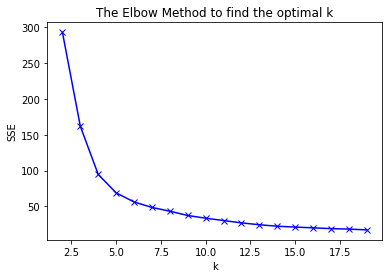

In [15]:
optimal_k = cluster.elbow_method(cluster_vars)

In [16]:
kmeans, train_clusters, test_clusters, cluster_counts = cluster.get_clusters_and_counts(5, ['lot_size', 'age', 'full_value'], 
                                                                                        'feature_age_value', train_scaled, test_scaled)

In [17]:
X_train, train_scaled, X_test, test_scaled, centroids = cluster.append_clusters_and_centroids(
                                X_train, train_scaled, train_clusters, 
                                X_test, test_scaled, test_clusters, 
                                cluster_col_name, centroid_col_names, kmeans)

In [18]:
X_train

,longitude,latitude,age,month,square_footage,lot_size,house_value,land_value,full_value,tax_rate,...,bathroomcnt,logerror,two_feature_value,centroid_bed_bath_ratio,centroid_square_footage,centroid_tax_rate,feature_age_value,centroid_lot_size,centroid_age,centroid_full_value
21711,-119173645.0,34238098.0,7.0,3,1464.0,7201.0,153720.0,153720.0,307440.0,0.024141,...,2.5,0.031199,2,0.119646,0.053951,0.016592,3,0.003580,0.067979,0.016010
72428,-118183524.0,34122442.0,60.0,9,1266.0,2911.0,93588.0,74869.0,168457.0,0.012600,...,2.0,0.115045,2,0.119646,0.053951,0.016592,1,0.001319,0.341684,0.008395
20516,-118105067.0,34053353.0,85.0,3,823.0,7564.0,86795.0,181819.0,268614.0,0.012805,...,2.0,0.001261,1,0.061464,0.049972,0.015433,4,0.001017,0.486874,0.010244
42112,-117971000.0,34065700.0,33.0,6,936.0,50291.0,99368.0,42578.0,141946.0,0.014431,...,2.0,-0.042390,1,0.061464,0.049972,0.015433,0,0.006493,0.166876,0.009092
6853,-118325639.0,33798484.0,41.0,1,2060.0,7592.0,100601.0,307982.0,408583.0,0.012669,...,3.0,0.055890,0,0.085495,0.109827,0.015615,0,0.006493,0.166876,0.009092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30754,-118071760.0,34586675.0,61.0,4,1056.0,7257.0,132794.0,33198.0,165992.0,0.016483,...,2.0,-0.012334,2,0.119646,0.053951,0.016592,1,0.001319,0.341684,0.008395
36351,-118337522.0,33783671.0,58.0,5,2220.0,23328.0,369551.0,1478204.0,1847755.0,0.011057,...,2.0,0.102556,0,0.085495,0.109827,0.015615,2,0.005151,0.255187,0.008474
51265,-117996812.0,33723862.0,55.0,6,1390.0,6001.0,86586.0,181689.0,268275.0,0.011759,...,2.0,0.001526,2,0.119646,0.053951,0.016592,2,0.005151,0.255187,0.008474
56584,-118281892.0,34522021.0,52.0,7,3123.0,225070.0,156736.0,13849.0,170585.0,0.012540,...,3.0,0.071266,0,0.085495,0.109827,0.015615,2,0.005151,0.255187,0.008474


## Month/Value/Feature

In [19]:
cluster_vars = train_scaled[['month', 'house_value', 'bathroomcnt']]
cluster_col_name = 'month_value_feature'
centroid_col_names = ['centroid_' + i for i in cluster_vars]

     k          sse
0    2  1482.622929
1    3   746.043152
2    4   500.389813
3    5   387.409809
4    6   331.192599
5    7   282.465229
6    8   246.291998
7    9   211.364000
8   10   185.041809
9   11   169.323145
10  12   153.438474
11  13   143.060480
12  14   131.532193
13  15   123.844530
14  16   113.580123
15  17   107.438733
16  18    94.605876
17  19    93.677330


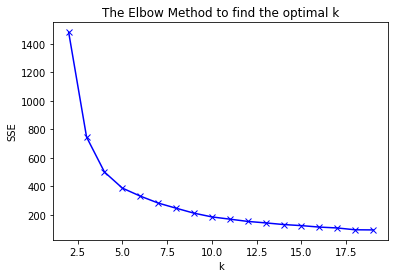

In [20]:
optimal_k = cluster.elbow_method(cluster_vars)

In [21]:
kmeans, train_clusters, test_clusters, cluster_counts = cluster.get_clusters_and_counts(5, ['month', 'house_value', 'bathroomcnt'], 
                                                                                        'month_value_feature', train_scaled, test_scaled)

In [22]:
X_train, train_scaled, X_test, test_scaled, centroids = cluster.append_clusters_and_centroids(
                                X_train, train_scaled, train_clusters, 
                                X_test, test_scaled, test_clusters, 
                                cluster_col_name, centroid_col_names, kmeans)

In [23]:
X_train

,longitude,latitude,age,month,square_footage,lot_size,house_value,land_value,full_value,tax_rate,...,centroid_square_footage,centroid_tax_rate,feature_age_value,centroid_lot_size,centroid_age,centroid_full_value,month_value_feature,centroid_month,centroid_house_value,centroid_bathroomcnt
21711,-119173645.0,34238098.0,7.0,3,1464.0,7201.0,153720.0,153720.0,307440.0,0.024141,...,0.053951,0.016592,3,0.003580,0.067979,0.016010,3,0.310328,0.020188,0.076539
72428,-118183524.0,34122442.0,60.0,9,1266.0,2911.0,93588.0,74869.0,168457.0,0.012600,...,0.053951,0.016592,1,0.001319,0.341684,0.008395,2,0.915944,0.020535,0.077016
20516,-118105067.0,34053353.0,85.0,3,823.0,7564.0,86795.0,181819.0,268614.0,0.012805,...,0.049972,0.015433,4,0.001017,0.486874,0.010244,3,0.310328,0.020188,0.076539
42112,-117971000.0,34065700.0,33.0,6,936.0,50291.0,99368.0,42578.0,141946.0,0.014431,...,0.049972,0.015433,0,0.006493,0.166876,0.009092,0,0.681891,0.021108,0.079321
6853,-118325639.0,33798484.0,41.0,1,2060.0,7592.0,100601.0,307982.0,408583.0,0.012669,...,0.109827,0.015615,0,0.006493,0.166876,0.009092,1,0.059470,0.020137,0.076869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30754,-118071760.0,34586675.0,61.0,4,1056.0,7257.0,132794.0,33198.0,165992.0,0.016483,...,0.053951,0.016592,1,0.001319,0.341684,0.008395,3,0.310328,0.020188,0.076539
36351,-118337522.0,33783671.0,58.0,5,2220.0,23328.0,369551.0,1478204.0,1847755.0,0.011057,...,0.109827,0.015615,2,0.005151,0.255187,0.008474,4,0.500000,0.021232,0.079617
51265,-117996812.0,33723862.0,55.0,6,1390.0,6001.0,86586.0,181689.0,268275.0,0.011759,...,0.053951,0.016592,2,0.005151,0.255187,0.008474,0,0.681891,0.021108,0.079321
56584,-118281892.0,34522021.0,52.0,7,3123.0,225070.0,156736.0,13849.0,170585.0,0.012540,...,0.109827,0.015615,2,0.005151,0.255187,0.008474,0,0.681891,0.021108,0.079321


## House/Month/Ratio

In [24]:
cluster_vars = train_scaled[['month', 'house_value', 'bed_bath_ratio']]
cluster_col_name = 'house_month_ratio'
centroid_col_names = ['centroid_' + i for i in cluster_vars]

In [25]:
kmeans, train_clusters, test_clusters, cluster_counts = cluster.get_clusters_and_counts(5, ['month', 'house_value', 'bed_bath_ratio'], 
                                                                                        'house_month_ratio', train_scaled, test_scaled)

In [26]:
X_train, train_scaled, X_test, test_scaled, centroids = cluster.append_clusters_and_centroids(
                                X_train, train_scaled, train_clusters, 
                                X_test, test_scaled, test_clusters, 
                                cluster_col_name, centroid_col_names, kmeans)

In [36]:
cluster.test_sig(X_train.two_feature_value, X_train)

,ttest,pval,stat_sig
0,-0.793601,0.427437,False
1,-4.573348,0.000005,True
2,3.378655,0.000731,True
3,3.573198,0.000360,True
4,-0.427188,0.669271,False


In [28]:
cluster.test_sig(X_train.feature_age_value, X_train)

,ttest,pval,stat_sig
0,1.296143,0.194961,False
1,-0.207451,0.835661,False
2,-0.919573,0.357840,False
3,-3.119410,0.001816,True
4,2.612006,0.009012,True


In [29]:
cluster.test_sig(X_train.month_value_feature, X_train)

,ttest,pval,stat_sig
0,-2.100181,0.035733,True
1,3.286496,0.001018,True
2,-1.541871,0.123127,False
3,2.964456,0.003040,True
4,-3.022742,0.002514,True


In [30]:
cluster.test_sig(X_train.house_month_ratio, X_train)

,ttest,pval,stat_sig
0,-2.100181,0.035733,True
1,3.286496,0.001018,True
2,-1.541871,0.123127,False
3,2.964456,0.003040,True
4,-3.022742,0.002514,True


In [33]:
X_train.house_month_ratio.value_counts()

0    14508
1    12488
4    10148
3     9282
2     7235
Name: house_month_ratio, dtype: int64

In [34]:
X_train.month_value_feature.value_counts()

0    14508
3    12488
2    10148
1     9282
4     7235
Name: month_value_feature, dtype: int64

In [38]:
X_train.shape

(53661, 33)

In [39]:
df.shape

(76659, 18)